In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
import spacy
from collections import defaultdict
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [3]:
nlp = spacy.load('en_core_web_sm')

data = pd.read_csv("articles.csv", encoding='latin-1')
print(data.head())

                                             Article  \
0  Data analysis is the process of inspecting and...   
1  The performance of a machine learning algorith...   
2  You must have seen the news divided into categ...   
3  When there are only two classes in a classific...   
4  The Multinomial Naive Bayes is one of the vari...   

                                               Title  
0                  Best Books to Learn Data Analysis  
1         Assumptions of Machine Learning Algorithms  
2          News Classification with Machine Learning  
3  Multiclass Classification Algorithms in Machin...  
4        Multinomial Naive Bayes in Machine Learning  


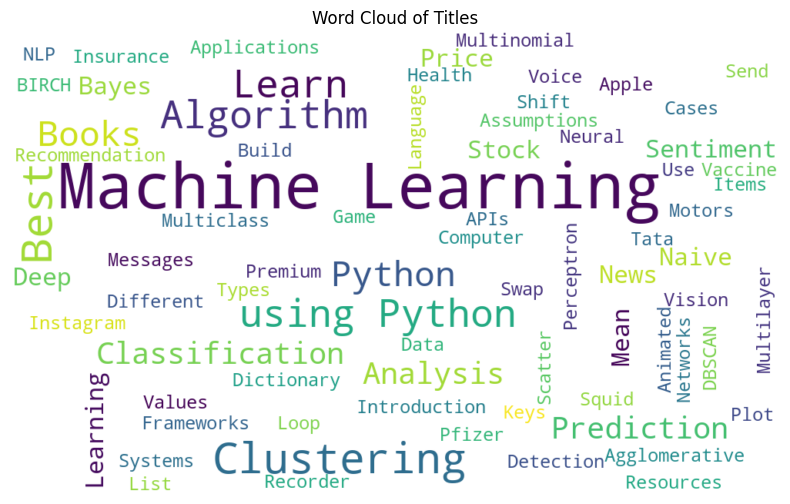

In [19]:
# Combine all titles into a single string
titles_text = ' '.join(data['Title'])

# Create a WordCloud object
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(titles_text)

# Plot the Word Cloud using Matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Titles')
plt.axis('off')  # Turn off axis
plt.show()

## Sentiment Analysis Distribution

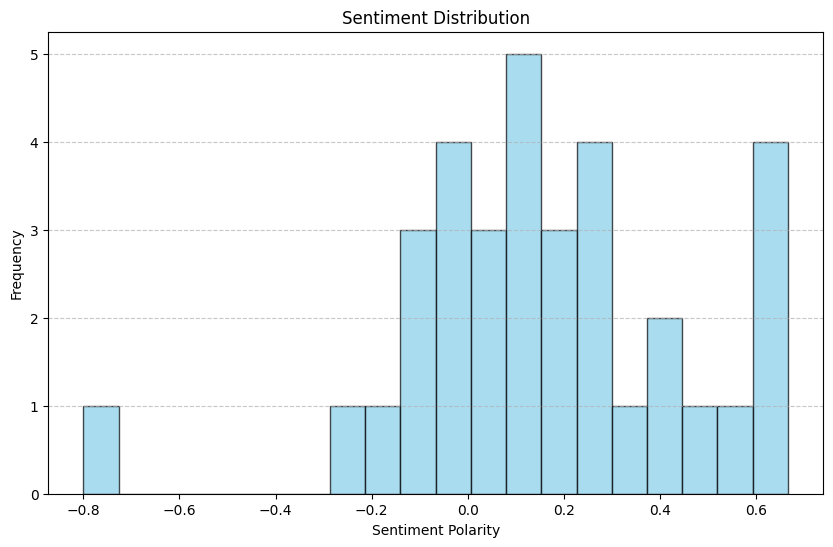

In [20]:
# Sentiment Analysis
data['Sentiment'] = data['Article'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Sentiment Distribution using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(data['Sentiment'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Named Entity Relationship

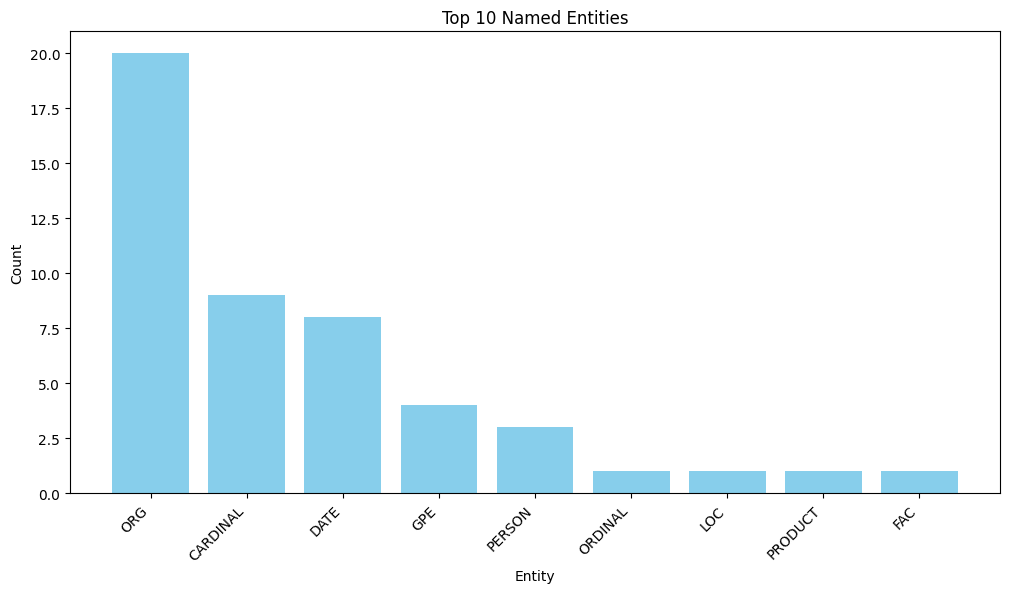

In [21]:
def extract_named_entities(text):
    doc = nlp(text)
    entities = defaultdict(list)
    for ent in doc.ents:
        entities[ent.label_].append(ent.text)
    return dict(entities)

data['Named_Entities'] = data['Article'].apply(extract_named_entities)

# Visualize NER using Matplotlib
entity_counts = Counter(entity for entities in data['Named_Entities'] for entity in entities)
top_entities = entity_counts.most_common(10)

entities, counts = zip(*top_entities)

plt.figure(figsize=(12, 6))
plt.bar(entities, counts, color='skyblue')
plt.title('Top 10 Named Entities')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


## Topic Modeling using Latent Dirichlet Allocation

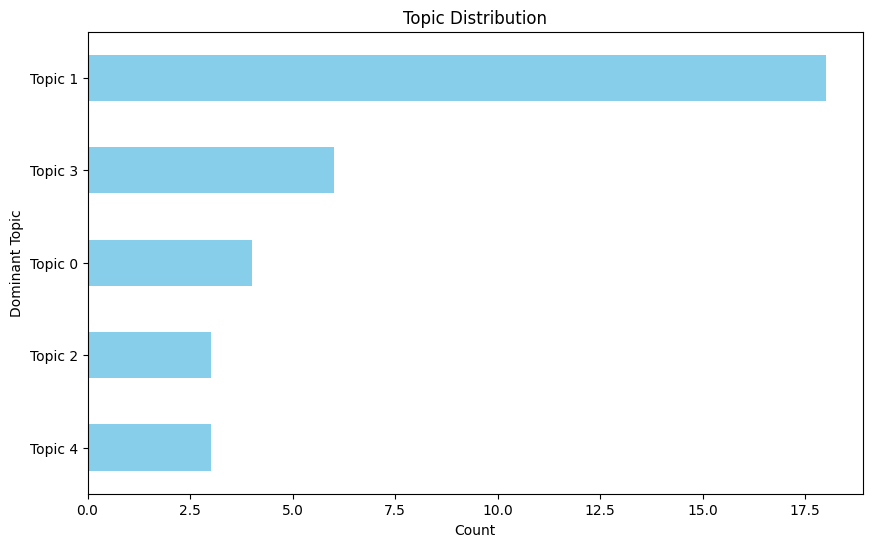

In [22]:
# Topic Modeling
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
tf = vectorizer.fit_transform(data['Article'])
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_topic_matrix = lda_model.fit_transform(tf)

# Visualize topics using Matplotlib
topic_names = ["Topic " + str(i) for i in range(lda_model.n_components)]
data['Dominant_Topic'] = [topic_names[i] for i in lda_topic_matrix.argmax(axis=1)]

# Plotting
plt.figure(figsize=(10, 6))
data['Dominant_Topic'].value_counts().sort_values().plot(kind='barh', color='skyblue')
plt.title('Topic Distribution')
plt.xlabel('Count')
plt.ylabel('Dominant Topic')
plt.show()
